# Instead of returns, use total index return as preproc. (Failed)

In [195]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import keras

In [196]:
#pretty plots
%matplotlib inline

#Load the index data
raw_data = pd.read_csv('index_data.csv', skiprows=1)
raw_data.set_index(['Date'])

#Relabeling the data
#relabeling the index data
index_close = raw_data.iloc[:,1:]
dates = raw_data.iloc[:,0]

#Display first 5 rows
raw_data.head(20)

,Date,Hang Seng Index,SSE Composite Index,ASX All Ordinaries,India S&P BSE SENSEX,TOPIX,KOSPI Composite Index,Taiwan TAIEX,FTSE Bursa Malaysia KLCI,FTSE Straits Times Index,...,Turkey BIST 100,S&P 500,DJ Industrial Average,Colombia IGBC,Canada S&P/TSX Composite,Brazil Bovespa Index,Mexico IPC,Israel TA-125,Saudi Arabia All Share (TASI),FTSE JSE All Share
0,20030303,9268.77,1525.483,2791.6,3277.27,825.63,590.04,4526.69,649.22,1243.08,...,10128.88,834.81,7837.86,1615.49,6472.53,10280.61,5926.65,328.97,2555.79,8423.99
1,20030304,9181.89,1524.304,2787.0,3244.80,828.05,576.58,4499.69,649.22,1230.76,...,10616.13,821.99,7704.87,1619.92,6422.33,10280.61,5911.24,328.02,2561.26,8317.58
2,20030305,9109.18,1517.179,2749.7,3226.10,822.81,560.26,4418.11,643.07,1226.87,...,10815.49,829.85,7775.60,1617.68,6389.87,10305.52,5914.41,324.70,2552.57,8190.79
3,20030306,8962.26,1498.343,2747.0,3190.35,816.22,555.33,4397.44,642.43,1204.95,...,10841.80,822.10,7673.99,1624.92,6328.60,10615.31,5913.92,329.22,2555.47,8134.38
4,20030307,8907.10,1493.093,2715.0,3153.06,796.17,546.02,4350.59,635.66,1184.96,...,10961.29,828.89,7740.03,1629.81,6359.86,10723.79,5907.93,329.22,2555.47,7973.71
5,20030310,8861.87,1468.919,2711.1,3125.88,784.52,544.24,4319.99,624.78,1170.85,...,10817.49,807.48,7568.18,1626.87,6277.67,10308.61,5859.77,324.99,2495.24,7853.26
6,20030311,8859.93,1469.548,2691.7,3154.91,770.62,532.53,4260.45,619.22,1175.41,...,10744.68,800.73,7524.06,1607.33,6290.73,10339.68,5821.10,325.17,2517.53,7766.04
7,20030312,8874.99,1475.008,2687.1,3110.08,782.36,531.81,4328.15,629.10,1196.47,...,10614.05,804.19,7552.07,1610.21,6228.63,10582.00,5809.97,324.19,2515.96,7769.65
8,20030313,8787.45,1464.649,2673.3,3108.24,778.52,531.78,4378.99,627.46,1195.49,...,10666.63,831.90,7821.75,1612.65,6295.44,10783.04,5931.96,329.33,2525.17,7977.99
9,20030314,8956.17,1466.044,2724.2,3108.24,786.06,537.65,4476.17,628.55,1217.17,...,10604.30,833.27,7859.71,1626.72,6304.49,10817.36,5993.01,329.33,2525.17,8081.24


In [197]:
#Dimensions
print("Number of data points:", index_close.shape[0])
print("Number of indices:", index_close.shape[1])

Number of data points: 3581
Number of indices: 42


In [198]:
np.max(index_close, axis=0)

Hang Seng Index                   31638.2200
SSE Composite Index                6092.0570
ASX All Ordinaries                 6853.6000
India S&P BSE SENSEX              32575.1700
TOPIX                              1816.9700
KOSPI Composite Index              2451.5300
Taiwan TAIEX                      10594.8200
FTSE Bursa Malaysia KLCI           1892.6500
FTSE Straits Times Index           3831.1900
Philippines PSE PSEi               8127.4800
NEW ZEALAND NZX 50(CAP)            7873.5500
Thailand SET                       1643.4300
Euro STOXX                          442.8700
FTSE 100                           7547.6300
France CAC 40                      6168.1500
Germany DAX (TR)                  12888.9500
FTSE MIB                          44364.4100
Belgium BEL-20                     4756.8200
Ireland ISEQ Overall               9968.4800
Netherlands AEX                     561.9000
Norway OSE OBX TR                   676.4600
Spain IBEX 35                     15945.7000
OMX Stockh

In [199]:
#lags, holding period
holding_period = 1 #5-trading days holding period

#Preprocess and transform to log-returns
#Calculate log returns.
daily_ret = index_close/np.amax(index_close, axis=0)
#Remove first row
dates = dates.drop(dates.index[0:holding_period]).reset_index(drop=True)
daily_ret = daily_ret.drop(daily_ret.index[0:holding_period]).reset_index(drop=True)

daily_ret.head(20)

,Hang Seng Index,SSE Composite Index,ASX All Ordinaries,India S&P BSE SENSEX,TOPIX,KOSPI Composite Index,Taiwan TAIEX,FTSE Bursa Malaysia KLCI,FTSE Straits Times Index,Philippines PSE PSEi,...,Turkey BIST 100,S&P 500,DJ Industrial Average,Colombia IGBC,Canada S&P/TSX Composite,Brazil Bovespa Index,Mexico IPC,Israel TA-125,Saudi Arabia All Share (TASI),FTSE JSE All Share
0,0.290215,0.250212,0.406648,0.099610,0.455731,0.235192,0.424707,0.343022,0.321247,0.126237,...,0.096140,0.331326,0.348346,0.099511,0.403353,0.139840,0.114308,0.218167,0.124183,0.146809
1,0.287917,0.249042,0.401205,0.099036,0.452847,0.228535,0.417007,0.339772,0.320232,0.124230,...,0.097946,0.334494,0.351544,0.099373,0.401314,0.140179,0.114369,0.215958,0.123762,0.144571
2,0.283273,0.245950,0.400811,0.097938,0.449220,0.226524,0.415056,0.339434,0.314511,0.124974,...,0.098184,0.331370,0.346950,0.099818,0.397466,0.144393,0.114360,0.218965,0.123903,0.143575
3,0.281530,0.245088,0.396142,0.096793,0.438186,0.222726,0.410634,0.335857,0.309293,0.124859,...,0.099266,0.334107,0.349936,0.100118,0.399429,0.145869,0.114244,0.218965,0.123903,0.140739
4,0.280100,0.241120,0.395573,0.095959,0.431774,0.222000,0.407745,0.330109,0.305610,0.124356,...,0.097964,0.325477,0.342166,0.099937,0.394267,0.140221,0.113312,0.216151,0.120982,0.138613
5,0.280039,0.241224,0.392743,0.096850,0.424124,0.217224,0.402126,0.327171,0.306800,0.123914,...,0.097305,0.322757,0.340172,0.098737,0.395088,0.140644,0.112565,0.216271,0.122063,0.137074
6,0.280515,0.242120,0.392071,0.095474,0.430585,0.216930,0.408516,0.332391,0.312297,0.123094,...,0.096122,0.324151,0.341438,0.098914,0.391187,0.143940,0.112349,0.215619,0.121987,0.137138
7,0.277748,0.240419,0.390058,0.095417,0.428472,0.216918,0.413314,0.331525,0.312041,0.122627,...,0.096598,0.335321,0.353631,0.099064,0.395383,0.146674,0.114708,0.219038,0.122433,0.140815
8,0.283081,0.240648,0.397485,0.095417,0.432621,0.219312,0.422487,0.332100,0.317700,0.123530,...,0.096033,0.335873,0.355347,0.099928,0.395952,0.147141,0.115889,0.219038,0.122433,0.142637
9,0.278276,0.241179,0.395559,0.094701,0.427751,0.210171,0.411332,0.328962,0.312777,0.122973,...,0.085878,0.347772,0.368106,0.099928,0.402367,0.147922,0.116216,0.223674,0.120113,0.142047


In [200]:
#Seperate the indices into 2 classes - lag or no_lag
no_lag = [0, 1, 2, 4, 5, 6, 9, 10]
lag = [i for i in range(0,daily_ret.shape[1]) if i not in no_lag]

#Processing the dataset by applying appropriate lags
lagged_data = daily_ret.iloc[:,lag].shift(1)
lagged_data = pd.concat([daily_ret.iloc[:,no_lag], lagged_data], axis=1)

#Removing the first row
lagged_data = lagged_data.drop(lagged_data.index[0]).reset_index(drop=True)
dates = dates.drop(dates.index[0]).reset_index(drop=True)

#Shifting HSI returns
lagged_data['Hang Seng Index'] = lagged_data['Hang Seng Index'].shift(-holding_period)
lagged_data = lagged_data.drop(lagged_data.index[-holding_period:]).reset_index(drop=True)
dates.drop(dates.index[-holding_period:]).reset_index(drop=True)

lagged_data.head(20)

,Hang Seng Index,SSE Composite Index,ASX All Ordinaries,TOPIX,KOSPI Composite Index,Taiwan TAIEX,Philippines PSE PSEi,NEW ZEALAND NZX 50(CAP),India S&P BSE SENSEX,FTSE Bursa Malaysia KLCI,...,Turkey BIST 100,S&P 500,DJ Industrial Average,Colombia IGBC,Canada S&P/TSX Composite,Brazil Bovespa Index,Mexico IPC,Israel TA-125,Saudi Arabia All Share (TASI),FTSE JSE All Share
0,0.283273,0.249042,0.401205,0.452847,0.228535,0.417007,0.124230,0.242626,0.099610,0.343022,...,0.096140,0.331326,0.348346,0.099511,0.403353,0.139840,0.114308,0.218167,0.124183,0.146809
1,0.281530,0.245950,0.400811,0.449220,0.226524,0.415056,0.124974,0.242579,0.099036,0.339772,...,0.097946,0.334494,0.351544,0.099373,0.401314,0.140179,0.114369,0.215958,0.123762,0.144571
2,0.280100,0.245088,0.396142,0.438186,0.222726,0.410634,0.124859,0.241631,0.097938,0.339434,...,0.098184,0.331370,0.346950,0.099818,0.397466,0.144393,0.114360,0.218965,0.123903,0.143575
3,0.280039,0.241120,0.395573,0.431774,0.222000,0.407745,0.124356,0.242269,0.096793,0.335857,...,0.099266,0.334107,0.349936,0.100118,0.399429,0.145869,0.114244,0.218965,0.123903,0.140739
4,0.280515,0.241224,0.392743,0.424124,0.217224,0.402126,0.123914,0.241551,0.095959,0.330109,...,0.097964,0.325477,0.342166,0.099937,0.394267,0.140221,0.113312,0.216151,0.120982,0.138613
5,0.277748,0.242120,0.392071,0.430585,0.216930,0.408516,0.123094,0.240525,0.096850,0.327171,...,0.097305,0.322757,0.340172,0.098737,0.395088,0.140644,0.112565,0.216271,0.122063,0.137074
6,0.283081,0.240419,0.390058,0.428472,0.216918,0.413314,0.122627,0.238020,0.095474,0.332391,...,0.096122,0.324151,0.341438,0.098914,0.391187,0.143940,0.112349,0.215619,0.121987,0.137138
7,0.278276,0.240648,0.397485,0.432621,0.219312,0.422487,0.123530,0.241117,0.095417,0.331525,...,0.096598,0.335321,0.353631,0.099064,0.395383,0.146674,0.114708,0.219038,0.122433,0.140815
8,0.285778,0.241179,0.395559,0.427751,0.210171,0.411332,0.122973,0.239890,0.095417,0.332100,...,0.096033,0.335873,0.355347,0.099928,0.395952,0.147141,0.115889,0.219038,0.122433,0.142637
9,0.289479,0.239639,0.409186,0.431245,0.219173,0.428485,0.123727,0.242841,0.094701,0.328962,...,0.085878,0.347772,0.368106,0.099928,0.402367,0.147922,0.116216,0.223674,0.120113,0.142047


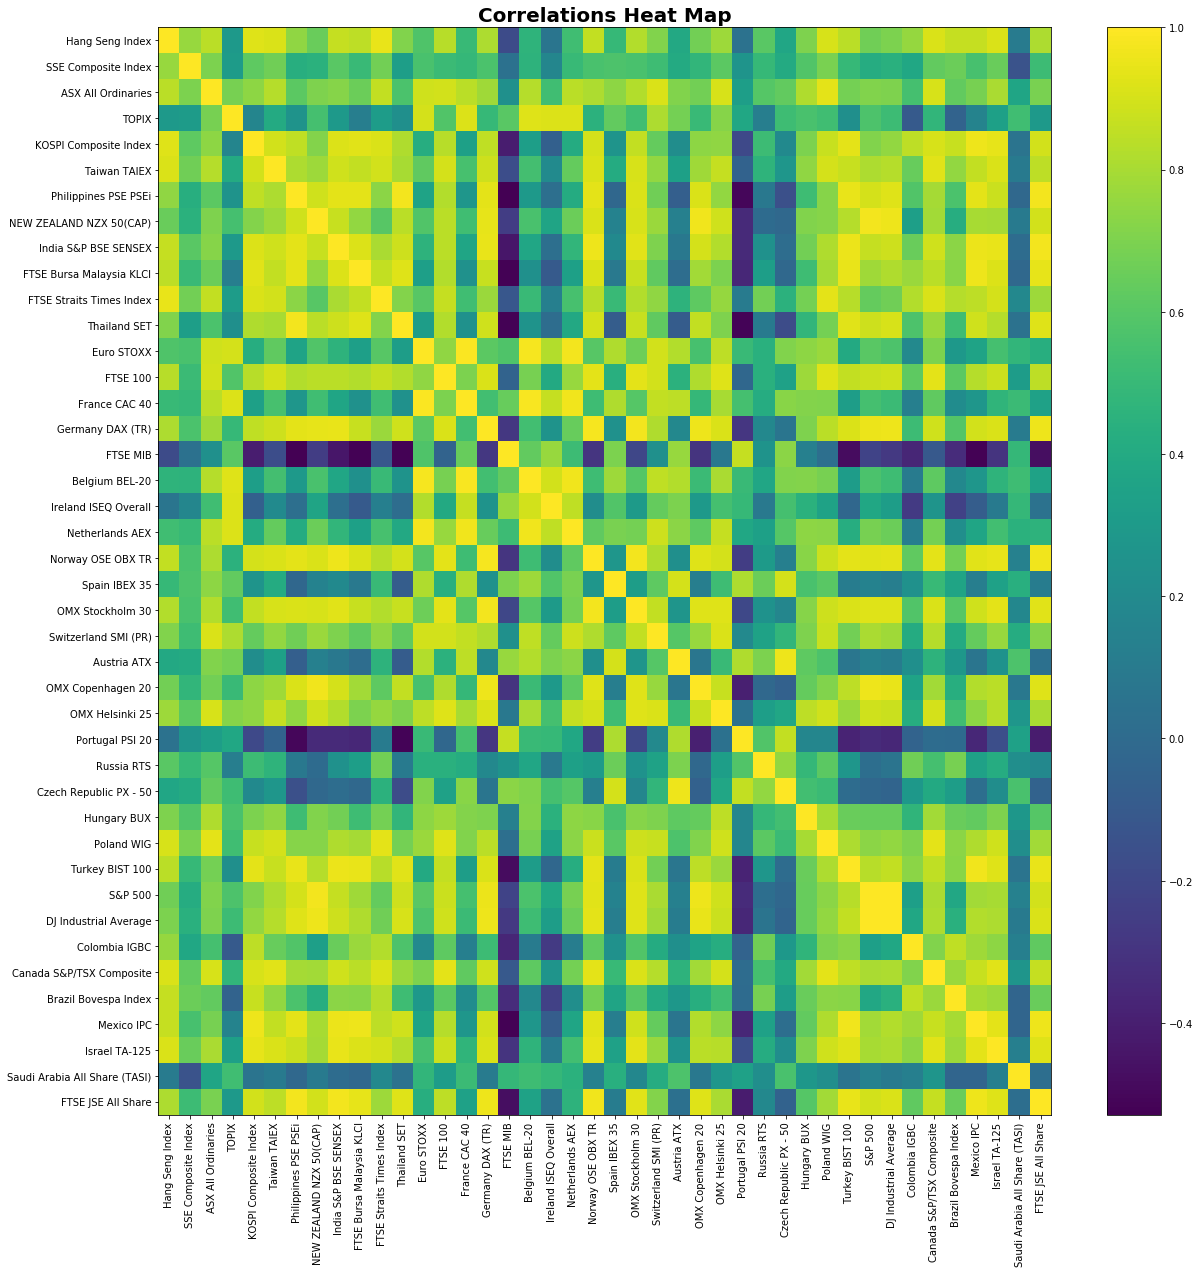

In [201]:
#Calculate correlation
corr = lagged_data.corr()

#Plot the correlation heatmap
plt.figure(figsize=(20,20))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns)
plt.title('Correlations Heat Map', fontsize=20, fontweight='bold')
plt.show()

In [202]:
#Seperate the features and the labels
labels = lagged_data.iloc[:,0]
X = lagged_data.drop(daily_ret.columns[0], axis=1).reset_index(drop=True)

#Generate the labels from daily Hang Seng returns

#Set labels cutoff for defining Up/Down/Neutral states
labels_cutoff = 0.000627 #Try lower levels....0.05 seems a bit too high



In [203]:
#labels = labels - labels.shift(holding_period)
#labels = labels.drop(labels.index[0:holding_period]).reset_index(drop=True)
#X = X.drop(X.index[0:holding_period]).reset_index(drop=True)

In [204]:
y = np.empty(labels.shape)
y[labels < -labels_cutoff] = 0 #Label -1 for returns lower than -0.05%
y[labels > labels_cutoff] = 2 #Label 1 for returns greater than 0.05%
y[(labels <= labels_cutoff ) & (labels >= -labels_cutoff)] = 1 #Label 0 for the rest

In [205]:
#Import Keras module
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping

#Import sklearn module
from sklearn.metrics import confusion_matrix

In [206]:
#Split into training set and test set
train_size = 0.8 #Again parameter to tune
val_size = 0.1

train_cut_index = int(np.floor(train_size * X.shape[0]))
val_cut_index = int(np.floor((train_size + val_size) * X.shape[0]))

X_train = np.array(X.iloc[0:(train_cut_index-1),:])
X_val = np.array(X.iloc[train_cut_index:(val_cut_index - 1),:])
X_test = np.array(X.iloc[val_cut_index:X.shape[0],:])

y_train = y[0:(train_cut_index-1)]
y_val = y[train_cut_index:val_cut_index-1]
y_test = y[val_cut_index:len(y)]

#Preproc the y_train and y_test using to_categorical function
y_train = to_categorical(y_train, num_classes=3)
y_val = to_categorical(y_val, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

In [207]:
#Prediction Period
print("Training Period Start:", dates[0])
print("Training Period End:", dates[train_cut_index-1])
print("Validation Period Start:", dates[train_cut_index])
print("Validation Period End:", dates[val_cut_index-1])
print("Test Period Start:", dates[val_cut_index])
print("Test Period End:", dates[len(dates)-1])
print("Number of data points in training set:", X_train.shape[0])
print("Number of data points in validation set:", X_val.shape[0])
print("Number of data points in test set:", X_test.shape[0])

Training Period Start: 20030305
Training Period End: 20141006
Validation Period Start: 20141007
Validation Period End: 20160317
Test Period Start: 20160318
Test Period End: 20170901
Number of data points in training set: 2861
Number of data points in validation set: 357
Number of data points in test set: 358


In [208]:
#Reshape data for inputting into LSTM
timestep = 1
X_train = np.reshape(X_train, (X_train.shape[0], timestep, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], timestep, X_val.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], timestep, X_test.shape[1]))

y_train = np.reshape(y_train, (y_train.shape[0], timestep, y_train.shape[1]))
y_val = np.reshape(y_val, (y_val.shape[0], timestep, y_val.shape[1]))
y_test = np.reshape(y_test, (y_test.shape[0], timestep, y_test.shape[1]))

In [209]:
#Evaluation metrics
from keras import backend as K

#Define f-beta score
def fbeta(y_true, y_pred, threshold_shift=0):
    beta = 0.6

    # just in case of hipster activation at the final layer
    y_pred = K.clip(y_pred, 0, 1)

    # shifting the prediction threshold from .5 if needed
    y_pred_bin = K.round(y_pred + threshold_shift)

    tp = K.sum(K.round(y_true * y_pred_bin), axis=1) + K.epsilon()
    fp = K.sum(K.round(K.clip(y_pred_bin - y_true, 0, 1)), axis=1)
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)), axis=1)

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    beta_squared = beta ** 2
    return K.mean((beta_squared + 1) * (precision * recall) / (beta_squared * precision + recall + K.epsilon()))

#Define precision score
def precision(y_true, y_pred, threshold_shift=0):

    # just in case of hipster activation at the final layer
    y_pred = K.clip(y_pred, 0, 1)

    # shifting the prediction threshold from .5 if needed
    y_pred_bin = K.round(y_pred + threshold_shift)

    tp = K.sum(K.round(y_true * y_pred_bin), axis=1) + K.epsilon()
    fp = K.sum(K.round(K.clip(y_pred_bin - y_true, 0, 1)), axis=1)

    precision = tp / (tp + fp)

    return precision

def hit_rate(y_true, y_pred):
    
    #Calculate Hit Rate of the prediction
    true_class = K.argmax(y_true, axis = -1)
    pred_class = K.argmax(y_pred, axis = -1)
    

In [210]:
#Print model evaluation metrics, takes in model scores from training and test set
def print_metrics(model_score):
    print("Test Loss:", model_score[0])
    print("Test F-beta:", model_score[1])
    print("Test Precision:", model_score[2])
    print("Test Accuracy:", model_score[3])

In [211]:
#Define plot metrics - can add more metrics towards it

def plot_metrics(model):
       
    #Plotting Loss over Epoch
    plt.figure(1)
    plt.plot(model.history['loss'])
    plt.plot(model.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training','Validation'], loc='upper left')
    
    #Plotting F-beta over Epoch
    plt.figure(2)
    plt.plot(model.history['fbeta'])
    plt.plot(model.history['val_fbeta'])
    plt.title('F-Beta Score, beta=0.6')
    plt.ylabel('F-Beta Score')
    plt.xlabel('Epoch')
    plt.legend(['Training','Validation'], loc='upper left')
    
    #Plotting Precision over Epoch
    plt.figure(3)
    plt.plot(model.history['precision'])
    plt.plot(model.history['val_precision'])
    plt.title('Model Precision')
    plt.ylabel('Precision')
    plt.xlabel('Epoch')
    plt.legend(['Training','Validation'], loc='upper left')
    
    #Plotting Hit Rate over Epoch
    plt.figure(4)
    plt.plot(model.history['acc'])
    plt.plot(model.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training','Validation'], loc='upper left')
    
    plt.show()

In [212]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = "Normalized confusion matrix"
    else:
        title = 'Confusion matrix, without normalization'

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [213]:
#Utility function to return class numbers from probabilities
def prob_to_class(pred):
    return(np.argmax(pred, axis=-1))

In [214]:
#Setting base LSTM Network Parameters
drop_out = 0.65
input_shape = X_train.shape
num_epoch = 100
loss_fcn = 'categorical_crossentropy'
learning_rate = 1
opt = optimizers.Nadam(lr=learning_rate)
alpha = 1
num_of_perceptron = np.int(0.5 * (X_train.shape[2] + 3)) * alpha

In [215]:
#Callbacks
saveModel = ModelCheckpoint(filepath='weights.hdf5', verbose=1, save_best_only=True, mode='auto')
earlyStop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto', min_delta=0.0001)
callbacks = [saveModel, earlyStop]

In [216]:
%%time
#Fit LSTM
from keras.layers import LSTM

#Setting up the instance
lstm_model = Sequential()

#Adding 1st LSTM layer
lstm_model.add(LSTM(num_of_perceptron, input_shape=input_shape[1:], return_sequences=True))
lstm_model.add(Dropout(drop_out))

#Adding Output Layer
lstm_model.add(Dense(3, activation='softmax'))
lstm_model.summary()

#Optimization
#Define Optimizer, using Stochastic Gradient Decent
lstm_model.compile(loss=loss_fcn, optimizer=opt, metrics=[fbeta, precision, 'accuracy'])

#Fitting the model
lstm = lstm_model.fit(X_train, y_train, epochs = num_epoch, verbose=1, validation_data=(X_val, y_val), shuffle=False, batch_size=1, callbacks=[earlyStop])

#Evaluation
lstm_score = lstm_model.evaluate(X_test, y_test)

#Predict
lstm_pred = lstm_model.predict(X_test, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 1, 22)             5632      
_________________________________________________________________
dropout_21 (Dropout)         (None, 1, 22)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 1, 3)              69        
Total params: 5,701
Trainable params: 5,701
Non-trainable params: 0
_________________________________________________________________
Train on 2861 samples, validate on 357 samples
Epoch 1/100
2861/2861 [==============================] - 16s - loss: 3.6549e-04 - fbeta: 0.9999 - precision: 1.0000 - acc: 1.0000 - val_loss: 1.1921e-07 - val_fbeta: 1.0000 - val_precision: 1.0000 - val_acc: 1.0000
Epoch 2/100
2861/2861 [==============================] - 14s - loss: 1.0444e-06 - fbeta: 1.0000 - precision: 1.0000 - acc: 1.0000 - val_loss: 

KeyboardInterrupt: 

In [ ]:
    print_metrics(lstm_score)
    
    plot_metrics(lstm)
    
    cfm = confusion_matrix(prob_to_class(y_test), prob_to_class(lstm_pred)) 
    plot_confusion_matrix(cfm, classes=['Down', 'Neutral', 'Up'], normalize=False)

In [ ]:
lstm_pred

In [ ]:
X_val